In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.shape

(20640, 10)

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['total_bedrooms'].isnull().sum()

207

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

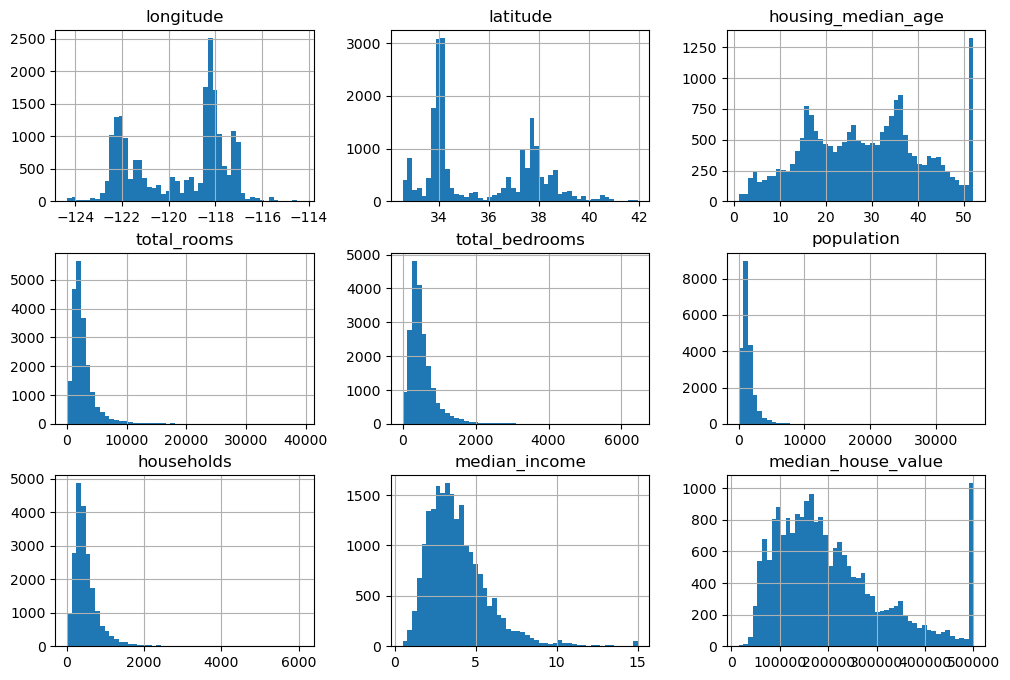

In [9]:
housing.hist(bins = 50, figsize=(12,8))
plt.show()

In [10]:
def split_train_test(data,test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
mytest = np.array([25, 4, 20,27,10,1,7,24])
mytest_dataset = housing.iloc[mytest]

In [12]:
mytest_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
25,-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
27,-122.28,37.85,52.0,1898.0,421.0,1102.0,397.0,1.8080,105500.0,NEAR BAY
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
24,-122.27,37.84,52.0,2224.0,437.0,1006.0,422.0,2.6000,132600.0,NEAR BAY


In [13]:
train_set ,test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10784,-117.91,33.63,32.0,1901.0,400.0,946.0,418.0,2.7264,311100.0,<1H OCEAN
5987,-117.72,34.10,52.0,2867.0,496.0,978.0,513.0,3.1477,291200.0,INLAND
3511,-118.47,34.26,34.0,1300.0,289.0,650.0,291.0,3.8875,199200.0,<1H OCEAN
8799,-118.37,33.77,26.0,6339.0,876.0,2540.0,880.0,10.1447,500001.0,NEAR OCEAN
2649,-124.10,40.50,42.0,2380.0,553.0,1300.0,504.0,1.7574,57500.0,<1H OCEAN


In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10372,-117.65,33.63,16.0,3388.0,425.0,1395.0,427.0,8.4471,351300.0,<1H OCEAN
17624,-121.95,37.26,10.0,3611.0,803.0,1599.0,716.0,5.2000,248700.0,<1H OCEAN
20493,-118.65,34.27,23.0,1724.0,265.0,934.0,306.0,6.0783,229200.0,<1H OCEAN
6547,-118.01,34.05,31.0,1135.0,355.0,1717.0,368.0,2.1602,161700.0,<1H OCEAN
16749,-122.47,37.70,45.0,3290.0,693.0,2466.0,666.0,3.6588,238600.0,NEAR OCEAN


## TEST set using sklearn


In [60]:
from sklearn.model_selection import train_test_split

In [63]:
train_set, test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)

### Median income

<Axes: >

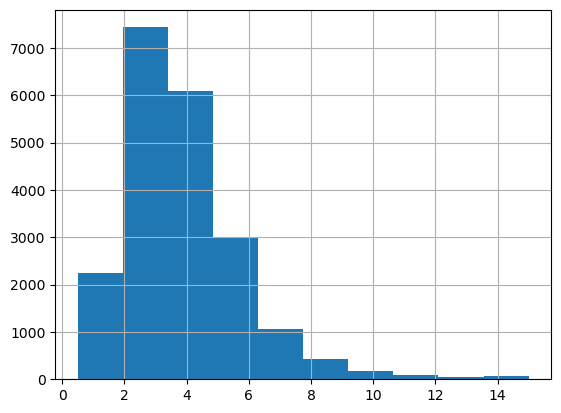

In [26]:
housing['median_income'].hist()

In [19]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

## End of digression

## Median income is converted from continuous numerical variable to categorical variable

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0.,1.5,3.0,4.5,6., np.inf],
                              labels = [1,2,3,4,5])

In [24]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

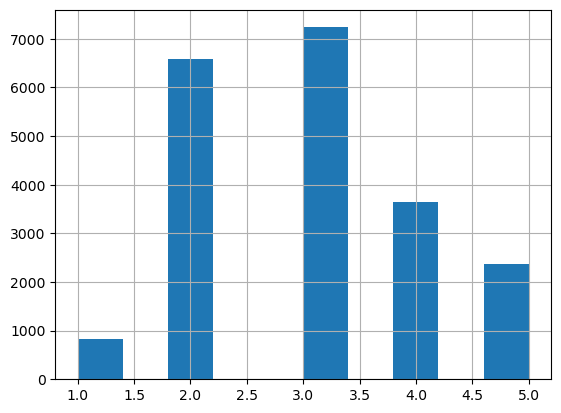

In [29]:
housing['income_cat'].hist()

In [40]:
housing['population'].max()

35682.0

In [56]:

population_sorted = housing.sort_values(by='population',ascending=False)

In [58]:
population_sorted['population']


15360    35682.0
9880     28566.0
13139    16305.0
10309    16122.0
6057     15507.0
          ...   
18210        8.0
12286        8.0
3126         6.0
12458        5.0
5342         3.0
Name: population, Length: 20640, dtype: float64

In [59]:
housing['population'].iloc[15360]

35682.0

## Stratified sampling

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1 , test_size = 0.2 , random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [66]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [67]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [68]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

### Removal of the income_cat column

In [69]:
for x in (strat_train_set , strat_test_set):
    x.drop("income_cat",axis =1,inplace=True)

# Data Exploration

In [70]:
housing = strat_train_set.copy()

### California state housing ( longitude , latitude)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 3200x1600 with 0 Axes>

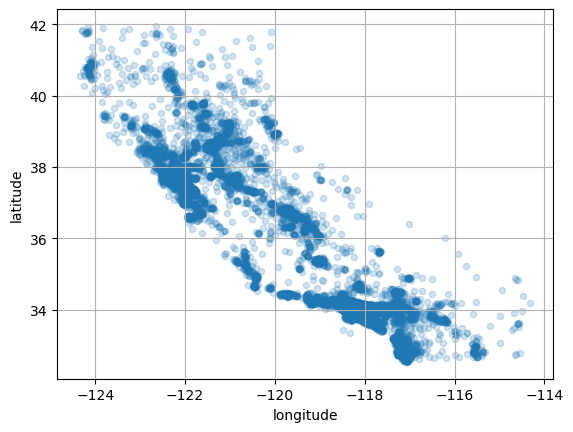

In [78]:
plt.figure(figsize=(16,8),dpi = 200)
housing.plot(kind = "scatter",x = 'longitude',y='latitude',grid = True , alpha = 0.2)
plt.show

<Figure size 1280x960 with 0 Axes>

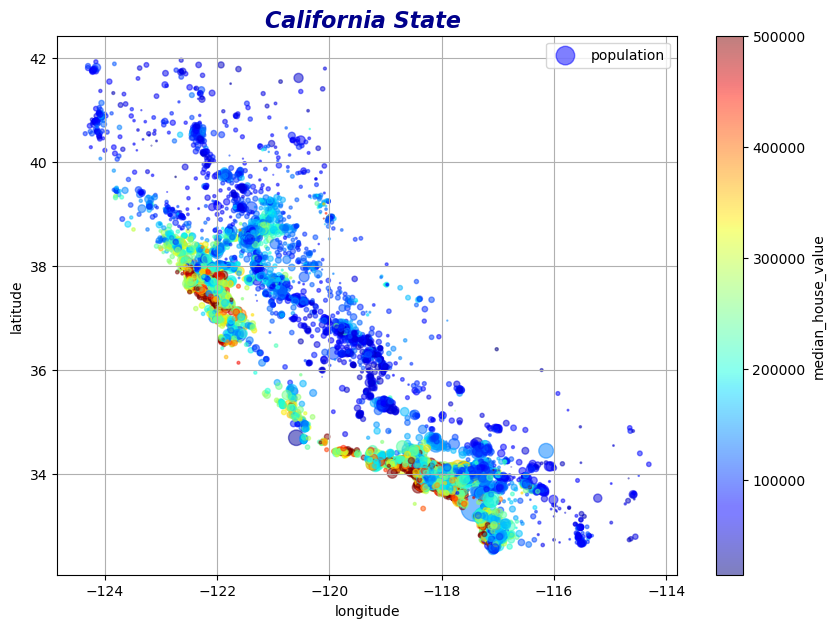

In [94]:
plt.figure(dpi = 200)
housing.plot(kind = "scatter",x = 'longitude',y='latitude', alpha = 0.5,
             s = housing['population']/100 , label = 'population',figsize = (10,7),
            c = 'median_house_value',cmap = plt.get_cmap("jet") ,colorbar=True,grid = True )
plt.title("California State ", fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'darkblue', 'fontstyle': 'italic'})
plt.show()

## Correlations

In [95]:
corr_matrix = housing.corr(numeric_only=True)

In [96]:
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_